In [4]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True #to preprocess only once

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "/home/trojan/Downloads/kagglecatsanddogs_3367a/PetImages/Cat"
    DOGS = "/home/trojan/Downloads/kagglecatsanddogs_3367a/PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

  1%|          | 130/12501 [00:00<00:09, 1291.86it/s]

/home/trojan/Downloads/kagglecatsanddogs_3367a/PetImages/Cat


  1%|          | 133/12501 [00:00<00:09, 1324.01it/s]

/home/trojan/Downloads/kagglecatsanddogs_3367a/PetImages/Dog


100%|██████████| 12501/12501 [00:09<00:00, 1347.36it/s]


Cats: 12476
Dogs: 12470


In [5]:
training_data = np.load("training_data.npy", allow_pickle=True)

In [6]:
print(len(training_data))

24946


In [7]:
print(training_data[1][0]) #first item shows input number, second item can be 0 and 1, 0 for image and 1 for its label

[[137 137 133 ... 139 134 143]
 [144 142 139 ... 144 137 141]
 [140 141 139 ... 151 153 143]
 ...
 [153 144 147 ... 156 154 156]
 [148 149 153 ... 154 148 152]
 [133 146 158 ... 143 148 143]]


In [8]:
import torch

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

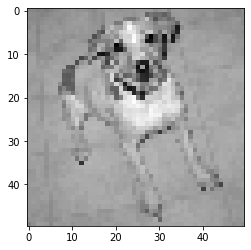

In [9]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0], cmap = "gray")

In [15]:
training_data[1][0]

array([array([[ 48,  54,  46, ...,  61, 153, 155],
       [ 39,  44,  49, ...,  66, 147, 145],
       [ 51,  44,  43, ...,  71, 144, 143],
       ...,
       [179, 178, 180, ..., 200, 200, 196],
       [169, 169, 177, ..., 204, 207, 191],
       [158, 166, 169, ..., 203, 197, 191]], dtype=uint8),
       array([1., 0.])], dtype=object)

In [4]:
np.eye(2)[1] #converts to one-hot

array([0., 1.])